In [5]:
# Melakukan import BeautifulSoup dan juga import requests serta json

from bs4 import BeautifulSoup
import requests, json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Memberikan link tempat data scraping akan dilakukan
url = 'https://editorial.rottentomatoes.com/guide/best-disney-movies-to-watch-now/'
page = requests.get(url)
soup = BeautifulSoup(page.text, 'html.parser')
movies = soup.find('div', class_="articleContentBody").find_all('div', class_="row countdown-item")

In [6]:
column_name = ['Rank', 'Movie Name', 'Year', 'Rating', 'Artist', 'Director']
df = pd.DataFrame(columns = column_name)
for movie in movies:
    rank = movie.find('div', class_="countdown-index-resposive").text.split('#')[1]
    name = movie.find('div', class_="article_movie_title").a.text
    year = movie.find('div', class_="article_movie_title").span.text.strip('()')
    rating = movie.find('span', class_="tMeterScore").text.split('%')[0]
    starring = movie.find('div', class_="info cast").text.split('Starring: ')[1].split(',')[0]
    director = movie.find('div', class_="info director").text.split('Directed By: ')[1].split(',')[0]

    new_row = [rank, name, year, rating, starring, director]

    new_row_df = pd.DataFrame([new_row], columns = column_name)
    df = pd.concat([df, new_row_df], ignore_index = True)

In [18]:
df

,Rank,Movie Name,Year,Rating,Artist,Director
0,1,Toy Story 2,1999,100,Tom Hanks,Ash Brannon
1,2,Toy Story,1995,100,Tom Hanks,John Lasseter
2,3,Pinocchio,1940,100,Don Brodie,Ben Sharpsteen
3,4,Finding Nemo,2003,99,Albert Brooks,Andrew Stanton
4,5,Inside Out,2015,98,Amy Poehler,Pete Docter
...,...,...,...,...,...,...
95,96,While You Were Sleeping,1995,81,Sandra Bullock,Jon Turteltaub
96,97,Mary Poppins Returns,2018,79,Emily Blunt,Rob Marshall
97,98,Free Guy,2021,80,Ryan Reynolds,Shawn Levy
98,99,Captain America: The First Avenger,2011,80,Chris Evans,Joe Johnston


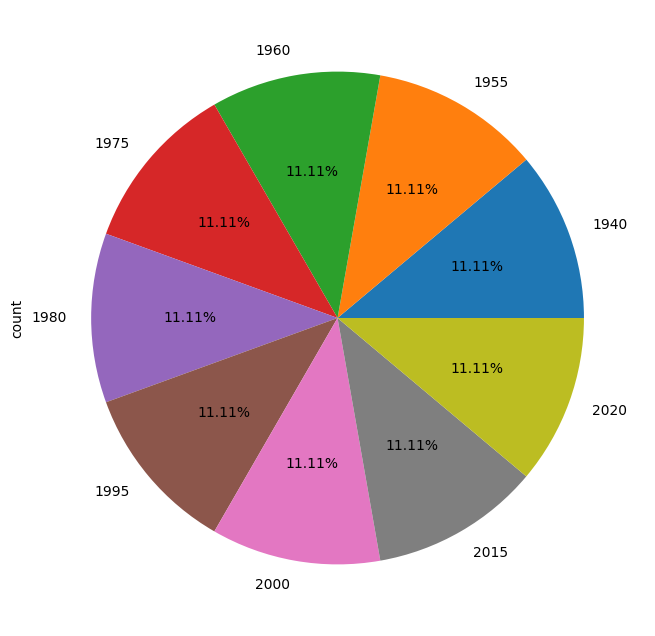

In [22]:
data = df['Year'].value_counts()
plt.figure(figsize=[10,8])
data.plot(kind = 'pie', autopct = '%.2f%%')
plt.show()

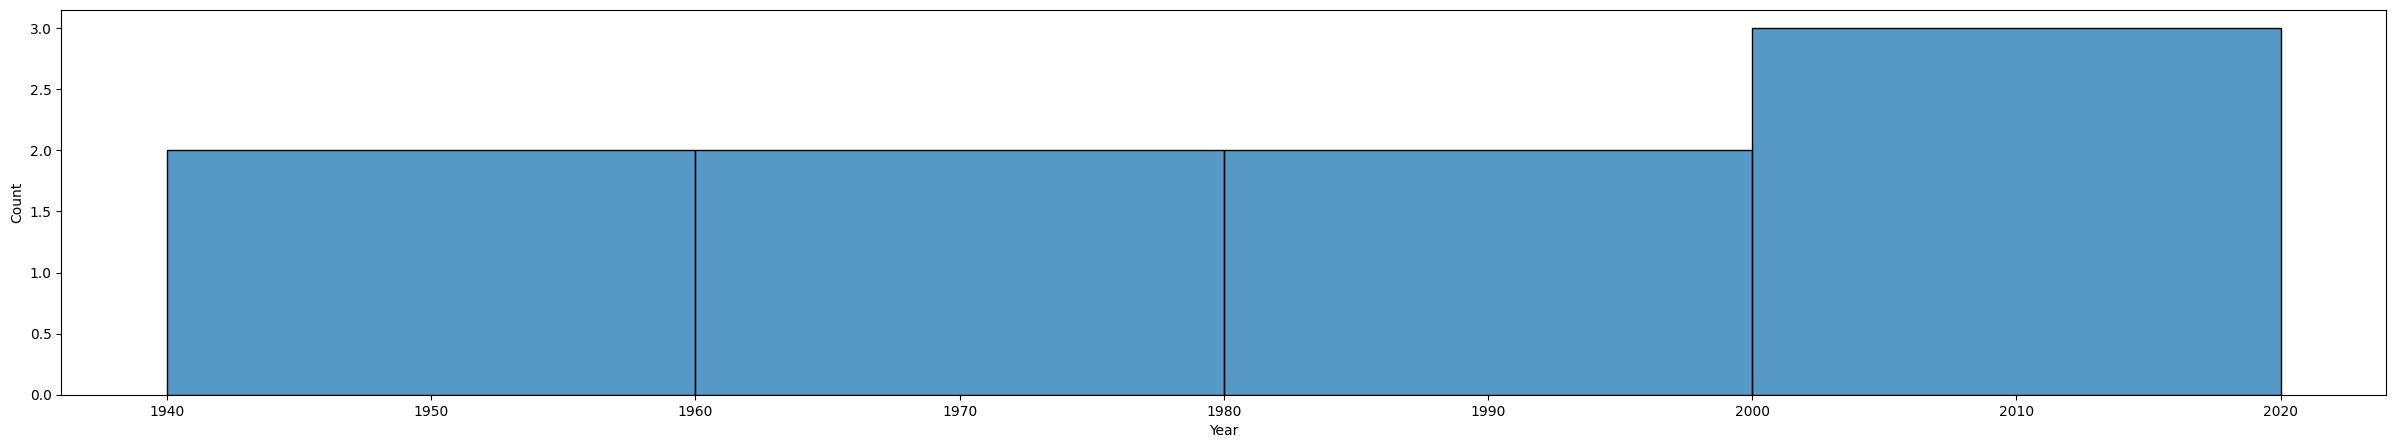

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming df is your DataFrame
df_sorted = df.sort_values(by='Year')

plt.figure(figsize=[30, 5])
sns.histplot(df_sorted, x='Year', bins=range(1940, 2030, 20))
plt.show()

